In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ps-dataset/order_data_last_six_month.xlsx - Worksheet.csv
/kaggle/input/ps-dataset/associated_order_item_data_last_six_month.xlsx - Worksheet.csv


In [2]:
dataset=pd.read_csv("/kaggle/input/ps-dataset/order_data_last_six_month.xlsx - Worksheet.csv")
associated_dataset=pd.read_csv("/kaggle/input/ps-dataset/associated_order_item_data_last_six_month.xlsx - Worksheet.csv")

In [3]:
dataset['order_date']= pd.to_datetime(dataset['order_date'],dayfirst=True)

In [4]:
dataset.head()

order_date  order_id     order_number  customer_id  \
0 2025-04-03    136349  SO/25-26/000818         5235   
1 2025-01-30    110393   SO/24-25/90881         7622   
2 2025-02-12    116427   SO/24-25/96511         3827   
3 2024-12-26     96182   SO/24-25/77411         2223   
4 2024-12-30     97858   SO/24-25/78975         6903   

                    customer_name       poc_name  poc_id    amount  discount  \
0  Anshu General Store Sector 34     Vikas Gupta       6  19125.00   1650.00   
1                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   
2      Shama chicken corner beta     Yash Pandey      51  62500.00   5000.00   
3       Bikaner Sweets ( Harola )      Swatantra      25   4520.00    420.00   
4            Lucknow kirana store      Raj Kumar    7039   1700.00      0.00   

   net_order_amount  profit order_status warehouse_name  warehouse_id  
0           17475.0     0.0       CLOSED          Noida             3  
1            8935.0   -56.4       CLOSED  Greater NOIDA             6  
2           57500.0  -650.0       CLOSED          Noida             3  
3            4100.0    40.0       CLOSED          Noida             3  
4            1700.0   -88.0       CLOSED    Gomti Nagar             1

In [5]:
dataset['warehouse_id'].unique()

array([3, 6, 1, 2, 4, 5])

In [6]:
dataset['order_status'].value_counts()

order_status
CLOSED    64317
OPEN        142
Name: count, dtype: int64

In [7]:
(dataset['profit']>=0).value_counts()

profit
False    49708
True     14751
Name: count, dtype: int64

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset, title="EDA Report", explorative=True)
profile.to_notebook_iframe()  # or profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00,  8.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import matplotlib.pyplot as plt

In [10]:
def piechart(series):
    """
    Automatically plots a pie chart from a Pandas Series.
    - Uses the series name as the chart title.
    - Displays value counts as percentages.
    """
    if not isinstance(series, pd.Series):
        raise TypeError("Input must be a pandas Series")

    counts = series.value_counts(dropna=False)
    labels = counts.index.astype(str)
    
    # Auto-title using series name or fallback
    title = series.name if series.name else "Pie Chart"

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.show()

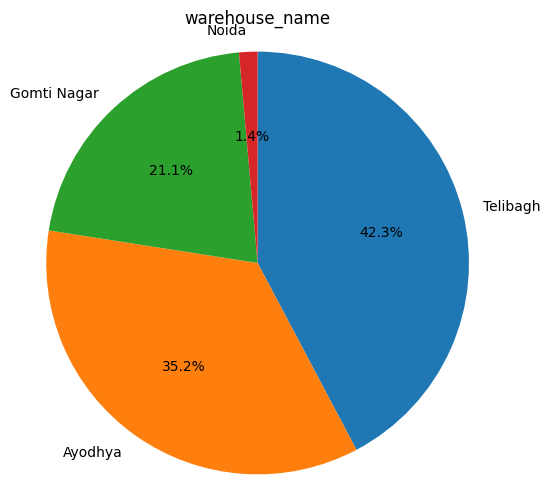

In [11]:
piechart(dataset[dataset['order_status']=='OPEN']['warehouse_name'])

In [12]:
dataset[dataset['order_status']=='OPEN']['order_date'].value_counts()

order_date
2025-04-10    87
2025-04-09    39
2025-04-08    13
2025-04-05     2
2025-04-07     1
Name: count, dtype: int64

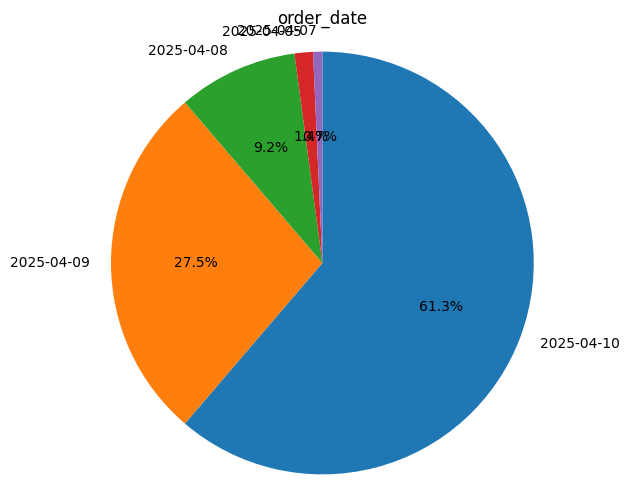

In [13]:
piechart(dataset[dataset['order_status']=='OPEN']['order_date'])

In [14]:
dataset['day_of_the_week']=pd.to_datetime(dataset['order_date'],dayfirst=True).dt.day_name()

In [15]:
dataset

order_date  order_id     order_number  customer_id  \
0     2025-04-03    136349  SO/25-26/000818         5235   
1     2025-01-30    110393   SO/24-25/90881         7622   
2     2025-02-12    116427   SO/24-25/96511         3827   
3     2024-12-26     96182   SO/24-25/77411         2223   
4     2024-12-30     97858   SO/24-25/78975         6903   
...          ...       ...              ...          ...   
64454 2024-12-26     96152   SO/24-25/77382          948   
64455 2024-12-26     96153   SO/24-25/77392         5822   
64456 2024-12-25     96166   SO/24-25/77390         1655   
64457 2024-12-26     96173   SO/24-25/77401         4268   
64458 2024-12-26     96175   SO/24-25/77400          998   

                              customer_name              poc_name  poc_id  \
0            Anshu General Store Sector 34            Vikas Gupta       6   
1                            bhai di rasoi          Abhay Srimali    7814   
2                Shama chicken corner beta            Yash Pandey      51   
3                 Bikaner Sweets ( Harola )             Swatantra      25   
4                      Lucknow kirana store             Raj Kumar    7039   
...                                     ...                   ...     ...   
64454                            Maa Bindwa  Utkarsh Pratap Singh      17   
64455             Yaduvanshi General Store             Raza Rizvi    5602   
64456  Brijwasi sweet and restaurant  (115)     Ashutosh Tripathi      37   
64457                      Ashutosh Traders           Mohd Yaqoob    4293   
64458                 Shawarna Wala Al Baik         Nirbhay Singh      24   

         amount  discount  net_order_amount  profit order_status  \
0      19125.00   1650.00           17475.0     0.0       CLOSED   
1       9670.48    735.48            8935.0   -56.4       CLOSED   
2      62500.00   5000.00           57500.0  -650.0       CLOSED   
3       4520.00    420.00            4100.0    40.0       CLOSED   
4       1700.00      0.00            1700.0   -88.0       CLOSED   
...         ...       ...               ...     ...          ...   
64454   1650.00    130.00            1520.0   -60.0       CLOSED   
64455   8255.00    935.00            7320.0  -455.0       CLOSED   
64456  20970.00   2140.00           18830.0  -195.0       CLOSED   
64457   3508.00    198.00            3310.0   -30.0       CLOSED   
64458  10690.00    700.00            9990.0    10.0       CLOSED   

      warehouse_name  warehouse_id day_of_the_week  
0              Noida             3        Thursday  
1      Greater NOIDA             6        Thursday  
2              Noida             3       Wednesday  
3              Noida             3        Thursday  
4        Gomti Nagar             1          Monday  
...              ...           ...             ...  
64454    Gomti Nagar             1        Thursday  
64455       Telibagh             2        Thursday  
64456          Noida             3       Wednesday  
64457       Telibagh             2        Thursday  
64458    Gomti Nagar             1        Thursday  

[64459 rows x 15 columns]

In [16]:
def plot_warehouse_weekly_line_chart(df, date_column='order_date', group_column='warehouse_name'):
    """
    Plots a line chart showing the number of entries per day (Mon-Sun)
    for each unique value in the 'warehouse_name' column.
    """
    # Convert date to datetime and extract day name
    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True, errors='coerce')
    df['day'] = df[date_column].dt.day_name()

    # Define week order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Group by warehouse and day
    grouped = df.groupby([group_column, 'day']).size().reset_index(name='count')

    # Pivot to make days columns
    pivot = grouped.pivot(index='day', columns=group_column, values='count').reindex(week_order)

    # Plot
    pivot.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title('Number of Entries per Day for Each Warehouse')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Warehouse', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

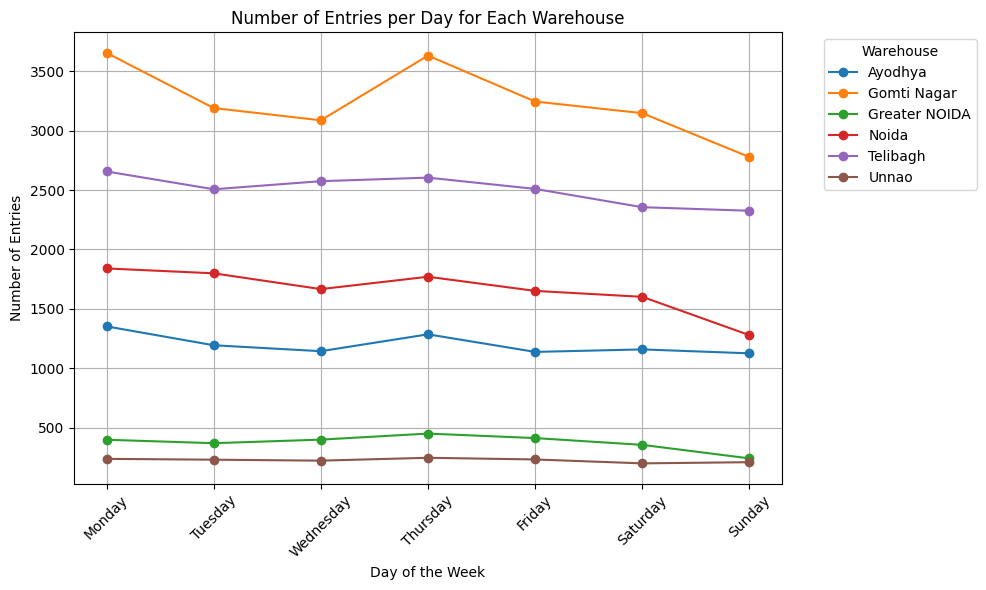

In [17]:
plot_warehouse_weekly_line_chart(dataset, date_column='order_date', group_column='warehouse_name')

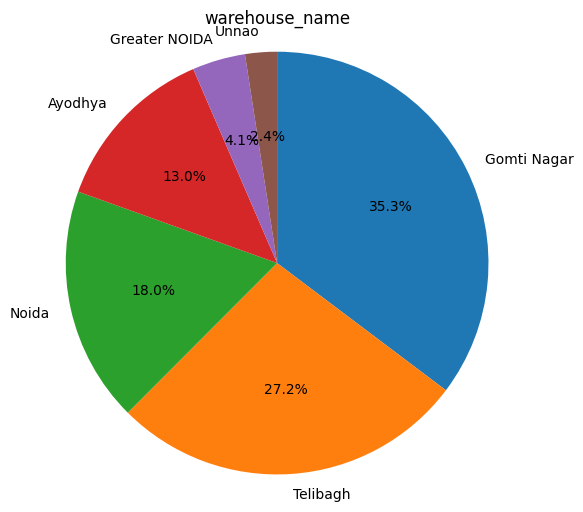

In [18]:
piechart(dataset['warehouse_name'])

In [19]:
def plot_smoothed_warehouse_trend(df, datetime_column='order_datetime', group_column='warehouse_name', window=14):
    """
    Plots a smoothed (rolling average) line chart of number of entries per date for each warehouse.
    """
    # Convert datetime column to datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column], dayfirst=True, errors='coerce')

    # Extract only the date (drop time)
    df['date'] = df[datetime_column].dt.date

    # Group by warehouse and date
    grouped = df.groupby([group_column, 'date']).size().reset_index(name='count')

    # Pivot to get dates as index, warehouses as columns
    pivot = grouped.pivot(index='date', columns=group_column, values='count').fillna(0)

    # Apply rolling average
    smoothed = pivot.rolling(window=window, min_periods=1).mean()

    # Plot
    smoothed.plot(kind='line', figsize=(14, 7))
    plt.title(f'{window}-Day Rolling Average of Daily Entries per Warehouse')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Number of Entries')
    plt.grid(True)
    plt.legend(title='Warehouse', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

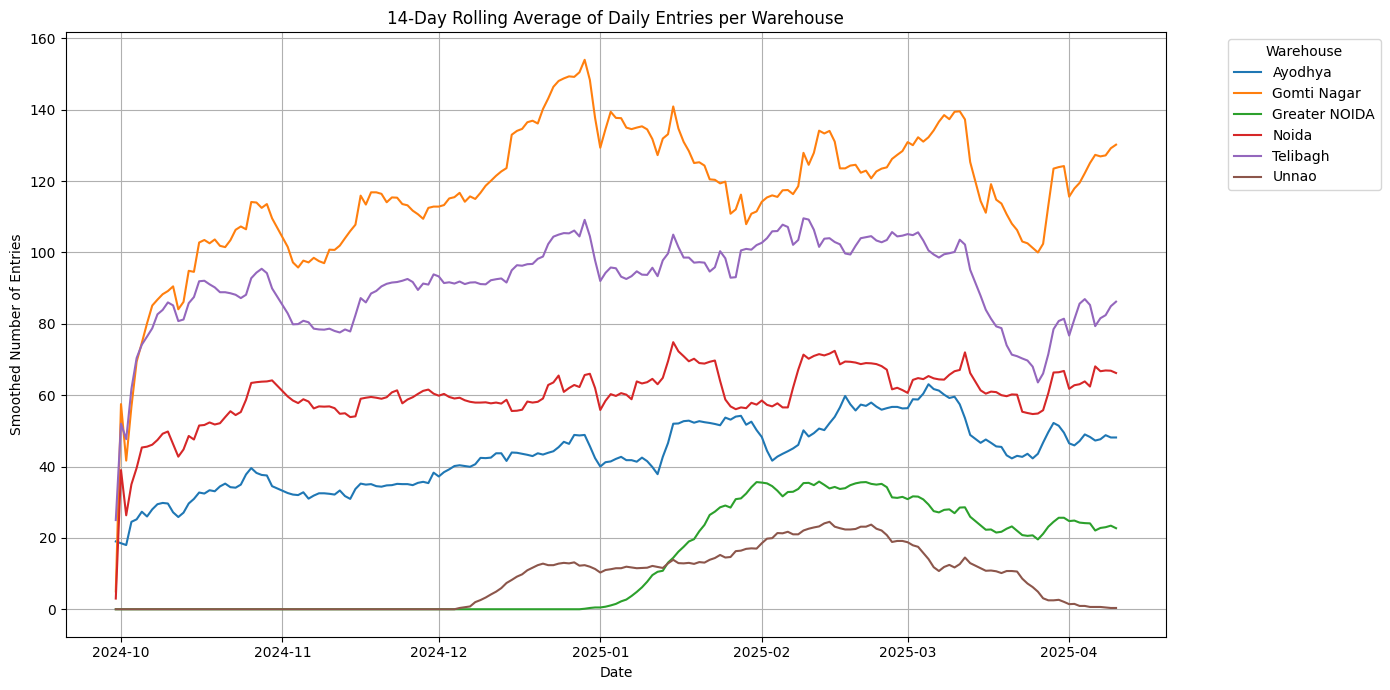

In [20]:
plot_smoothed_warehouse_trend(dataset, datetime_column='order_date', group_column='warehouse_name')

In [21]:
first_order_dates = dataset.groupby('warehouse_name')['order_date'].min().reset_index()

In [22]:
first_order_dates.columns = ['Warehouse', 'First Order Date']

In [23]:
print(first_order_dates)

       Warehouse First Order Date
0        Ayodhya       2024-09-30
1    Gomti Nagar       2024-09-30
2  Greater NOIDA       2024-12-29
3          Noida       2024-09-30
4       Telibagh       2024-09-30
5          Unnao       2024-12-05


In [24]:
dataset

order_date  order_id     order_number  customer_id  \
0     2025-04-03    136349  SO/25-26/000818         5235   
1     2025-01-30    110393   SO/24-25/90881         7622   
2     2025-02-12    116427   SO/24-25/96511         3827   
3     2024-12-26     96182   SO/24-25/77411         2223   
4     2024-12-30     97858   SO/24-25/78975         6903   
...          ...       ...              ...          ...   
64454 2024-12-26     96152   SO/24-25/77382          948   
64455 2024-12-26     96153   SO/24-25/77392         5822   
64456 2024-12-25     96166   SO/24-25/77390         1655   
64457 2024-12-26     96173   SO/24-25/77401         4268   
64458 2024-12-26     96175   SO/24-25/77400          998   

                              customer_name              poc_name  poc_id  \
0            Anshu General Store Sector 34            Vikas Gupta       6   
1                            bhai di rasoi          Abhay Srimali    7814   
2                Shama chicken corner beta            Yash Pandey      51   
3                 Bikaner Sweets ( Harola )             Swatantra      25   
4                      Lucknow kirana store             Raj Kumar    7039   
...                                     ...                   ...     ...   
64454                            Maa Bindwa  Utkarsh Pratap Singh      17   
64455             Yaduvanshi General Store             Raza Rizvi    5602   
64456  Brijwasi sweet and restaurant  (115)     Ashutosh Tripathi      37   
64457                      Ashutosh Traders           Mohd Yaqoob    4293   
64458                 Shawarna Wala Al Baik         Nirbhay Singh      24   

         amount  discount  net_order_amount  profit order_status  \
0      19125.00   1650.00           17475.0     0.0       CLOSED   
1       9670.48    735.48            8935.0   -56.4       CLOSED   
2      62500.00   5000.00           57500.0  -650.0       CLOSED   
3       4520.00    420.00            4100.0    40.0       CLOSED   
4       1700.00      0.00            1700.0   -88.0       CLOSED   
...         ...       ...               ...     ...          ...   
64454   1650.00    130.00            1520.0   -60.0       CLOSED   
64455   8255.00    935.00            7320.0  -455.0       CLOSED   
64456  20970.00   2140.00           18830.0  -195.0       CLOSED   
64457   3508.00    198.00            3310.0   -30.0       CLOSED   
64458  10690.00    700.00            9990.0    10.0       CLOSED   

      warehouse_name  warehouse_id day_of_the_week        day        date  
0              Noida             3        Thursday   Thursday  2025-04-03  
1      Greater NOIDA             6        Thursday   Thursday  2025-01-30  
2              Noida             3       Wednesday  Wednesday  2025-02-12  
3              Noida             3        Thursday   Thursday  2024-12-26  
4        Gomti Nagar             1          Monday     Monday  2024-12-30  
...              ...           ...             ...        ...         ...  
64454    Gomti Nagar             1        Thursday   Thursday  2024-12-26  
64455       Telibagh             2        Thursday   Thursday  2024-12-26  
64456          Noida             3       Wednesday  Wednesday  2024-12-25  
64457       Telibagh             2        Thursday   Thursday  2024-12-26  
64458    Gomti Nagar             1        Thursday   Thursday  2024-12-26  

[64459 rows x 17 columns]